In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize, MinMaxScaler
from scipy.sparse import coo_matrix, csr_matrix
%matplotlib inline
import os
import seaborn as sns

In [3]:
DatabaseDF = pd.read_csv("CleanedDataset.csv")

In [4]:
DatabaseDF.head()

,Unnamed: 0,Operator,Well Name,Formation,Lateral Length,Stages,Township,Range,Section,"Total Prop, lbs",...,Fluid Type from DI,SPACING_CAPPED,12 month Cum Prod,Completion Type,Sleeves,P&P,Frac Ports,Repeater Ports,CT,Year Drilled
0,0,Operator 1,Well 1,MBH,5114.0,30.0,141,99,10,0.0,...,NaN,660.0,33.55,NaN,NaN,NaN,NaN,NaN,NaN,2006.0
1,1,Operator 2,Well 2,MBH,5181.0,NaN,142,99,16,418000.0,...,NaN,660.0,27.62,NaN,NaN,NaN,NaN,NaN,NaN,2005.0
2,2,Operator 2,Well 3,MBH,4780.0,15.0,142,99,24,568407.0,...,NaN,660.0,11.19,OH,NaN,NaN,NaN,NaN,NaN,2006.0
3,3,Operator 1,Well 4,MBH,10654.0,1.0,142,99,1,845000.0,...,NaN,660.0,27.85,NaN,NaN,NaN,NaN,NaN,NaN,2007.0
4,4,Operator 2,Well 5,MBH,5209.0,1.0,142,99,35,297366.0,...,NaN,660.0,50.88,OH,NaN,NaN,NaN,NaN,NaN,2006.0


## Definition

Surface plots are 3D dimensional analysis plots. They take X and Y, which are independent variables, and have Z as a dependent variable. The Z variable is created to draw isolines on a countor plot or surface plot. 

Z is a variable created to see the relation between the two independent variables, usually location, but we can experiment with the other variables as well. 

In [5]:
X = DatabaseDF['Longitude']
Y = DatabaseDF['Latitude']

In [6]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

In [7]:
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

Z is the dependent variable that is created with X and Y meshgrid. This take the values of X and Y, over the domain to graph them onto the 3D graph. The meshgrid makes X and Y into a new matrix R. R is then changed using the sin variable because it is the distance from the origin. 

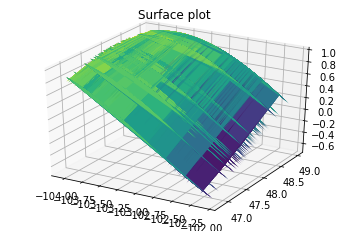

In [16]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(X, Y, Z,cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
plt.show()

There is some clear relationship between the Longitude and Latitude of the data that helps the surface plot look a way as a "3D decreasing slope."

In [17]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE

In [18]:
MAE(Y, Z)

47.55176981794301

In [19]:
X = DatabaseDF['Total Prop, lbs']
Y = DatabaseDF['12 month Cum Prod']

In [20]:
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

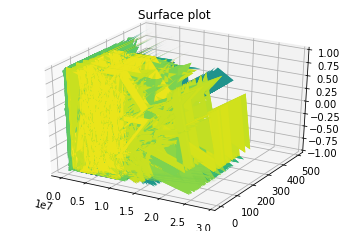

In [21]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(X, Y, Z,cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
plt.show()

Looks extremely like a rectangle, there is some clear correlation between Total Prop and 12 month Cum Prod since the values clearly create some figure. 

In [22]:
X = DatabaseDF['Longitude']
Y = DatabaseDF['12 month Cum Prod']

X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

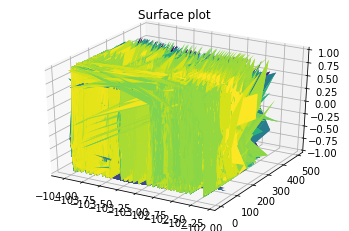

In [23]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(X, Y, Z,cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
plt.show()

Similar to the previous plot on a recatangular plot. 

In [24]:
X = DatabaseDF['Latitude']
Y = DatabaseDF['12 month Cum Prod']

X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

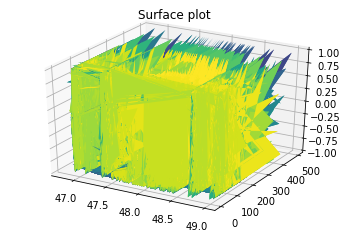

In [25]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(X, Y, Z,cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
plt.show()

In [26]:
X = DatabaseDF['Range']
Y = DatabaseDF['12 month Cum Prod']

X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

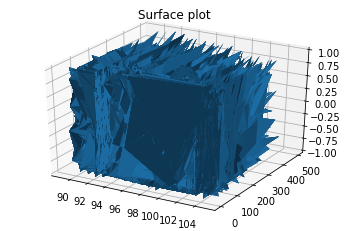

In [27]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(X, Y, Z, edgecolor='none')
ax.set_title('Surface plot')
plt.show()

In [28]:
MAE(Y, Z)

98.4193590873414

We are able to see that there is a creation of some sort of rectangular prism that can show some correlation to the variables I have used. it is clear that the surface plot is best used for location purposes. Therefore the only location based on the plots. I will now try Section and Township as well to apply to the production.

In [34]:
X = DatabaseDF['Range']
Y = DatabaseDF['Longitude']

X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

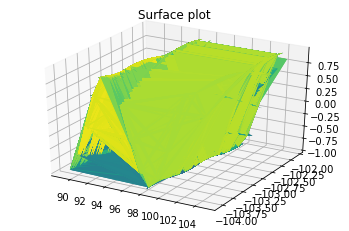

In [35]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(X, Y, Z,cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
plt.show()

A creation of a rectangular prism. These creation of shapes will require more research into what these data points suggest and if there is a strong correlation at all.

In [36]:
MAE(X, Z)

95.90443729345792

In [37]:
MAE(Y, Z)

102.98695464724324